# the projet NeuralZOO

Pour la reconnaissance d'animaux, un type de réseau de neurones convolutionnel (CNN) qui pourrait être utilisé est un réseau de neurones convolutifs à deux étages. Dans ce type de CNN, la première étape consiste à extraire les caractéristiques à partir de l'image en utilisant une couche de convolution, suivie d'une couche de pooling, puis d'une couche de normalisation de lot. La deuxième étape consiste à utiliser ces caractéristiques pour classer l'image en utilisant une couche entièrement connectée et une fonction d'activation softmax. De nombreux travaux de recherche ont été réalisés dans ce domaine ces dernières années, notamment pour la reconnaissance d'espèces animales à partir d'images.

Il est important de noter que la reconnaissance d'animaux est un domaine de recherche complexe, car il existe une grande variabilité dans les images d'animaux en raison de la variation de leur posture , de leur taille, de leur couleur, etc. Les CNN sont souvent entraînés sur des ensembles de données volumineux et diversifiés pour être en mesure de gérer ces variations et de fournir des résultats précis.

In [1]:
import pickle

import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# data extraction and visualization command

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [3]:
def wanted_picture (img, batch_meta, num):
    label_name = batch_meta['label_names']
    image = img['data'][num]
    label = img['labels'][num]
    image = image.reshape(3,32,32)
    image = image.transpose(1,2,0)
    plt.imshow(image)
    plt.title(label_name[label])
    return

In [4]:
def random_picture (sample, batch_meta):
    images = sample['data']
    images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
    labels = sample['labels']
    label_names = batch_meta['label_names']

    rows, columns = 5, 5
    imageId = np.random.randint(0, len(images), rows * columns)
    images = images[imageId]
    labels = [labels[i] for i in imageId]


    fig=plt.figure(figsize=(10, 10))

    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1])
        plt.xticks([])
        plt.yticks([])
        plt.title("{}"
              .format(label_names[labels[i-1]]))
    return 

In [5]:
def sample_picture(sample, batch_meta):
    images = sample['data']
    images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
    labels = sample['labels']
    label_names = batch_meta['label_names']

    n_labels = len(label_names)
    label_indices = {}
    images_for_labels = []

    for i in range(n_labels):
        label_indices[i] = np.where(np.array(labels) == i)[0]
        images_for_labels.append(images[np.random.choice(label_indices[i])])

    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    axs = axs.ravel()
    for i in range(n_labels):
        axs[i].imshow(images_for_labels[i])
        axs[i].axis('off')
        axs[i].set_title(label_names[i])
    plt.show()

In [6]:
def picture_of_animals(sample, batch_meta):
    images = sample['data']
    images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
    labels = sample['labels']
    label_names = batch_meta['label_names']

    animal_label_names = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']

    animal_label_indices = []
    for name in animal_label_names:
        animal_label_indices.append(label_names.index(name))

    images_for_labels = []
    for index in animal_label_indices:
        animal_indices = np.where(np.array(labels) == index)[0]
        random_index = np.random.choice(animal_indices)
        images_for_labels.append(images[random_index])

    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    axs = axs.ravel()
    for i in range(len(animal_label_names)):
        axs[i].imshow(images_for_labels[i])
        axs[i].axis('off')
        axs[i].set_title(animal_label_names[i])
    plt.show()

In [7]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\data_batch_1'
data_batch_1 = unpickle(file)

In [8]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\data_batch_2'
data_batch_2 = unpickle(file)

In [9]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\data_batch_3'
data_batch_3 = unpickle(file)

In [10]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\data_batch_4'
data_batch_4 = unpickle(file)

In [11]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\data_batch_5'
data_batch_5 = unpickle(file)

In [12]:
file = r'C:\Users\steph\NeuralZOO\cifar-10-batches-py\batches.meta'
batch_meta = unpickle(file)

In [13]:
print(data_batch_1.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [14]:
for item in data_batch_1:
    print(item, type(data_batch_1[item]))                       

batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>


start of area calculations

In [15]:
X_train = data_batch_1['data']
X_train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [16]:
X_train.shape

(10000, 3072)

In [17]:
image = data_batch_1['data'][0]
image = image.reshape(3,32,32)
print(image.shape)

(3, 32, 32)


In [18]:
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


In [19]:
print("Label Names:", batch_meta['label_names'] )

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [20]:
X_train = data_batch_1['data']

X_train = X_train.reshape(len(X_train),3,32,32)

X_train = X_train.transpose(0,2,3,1)

img_x, img_y, channels = 32, 32, 3

now i try the visualization command

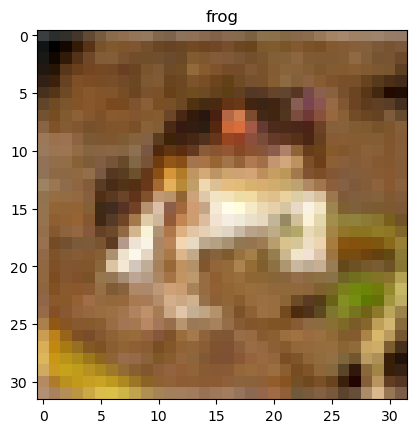

In [21]:
wanted_picture(data_batch_1, batch_meta, 0)

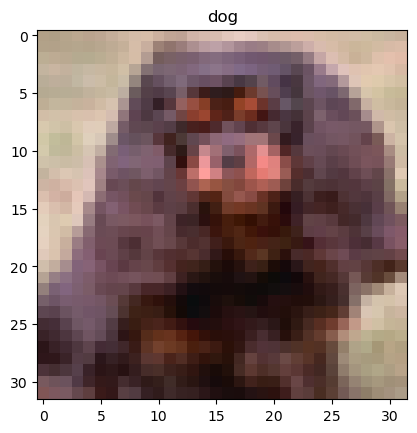

In [22]:
wanted_picture(data_batch_2, batch_meta, -1)

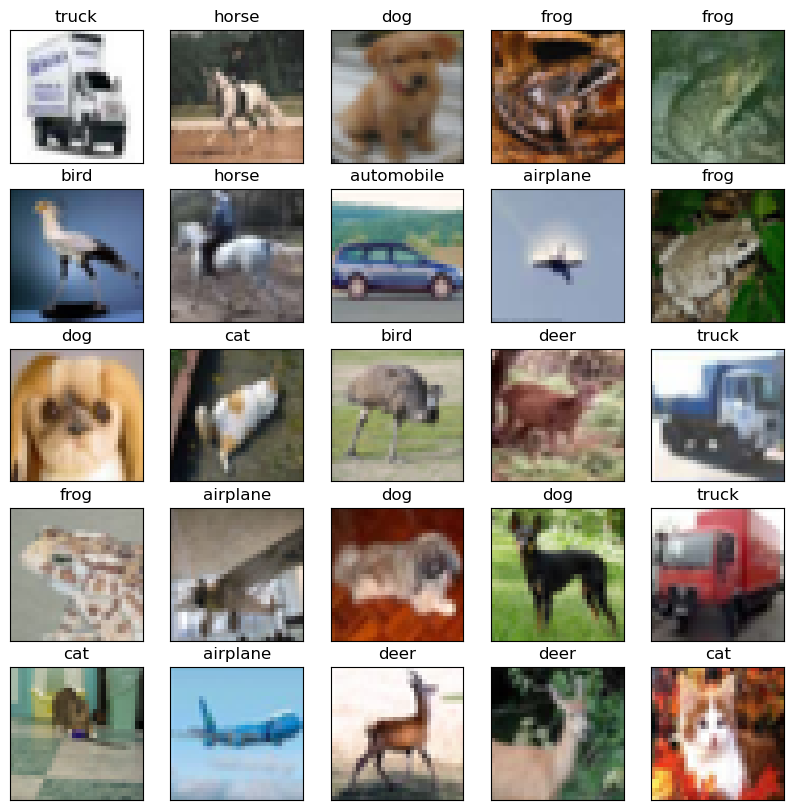

In [23]:
random_picture(data_batch_1, batch_meta)

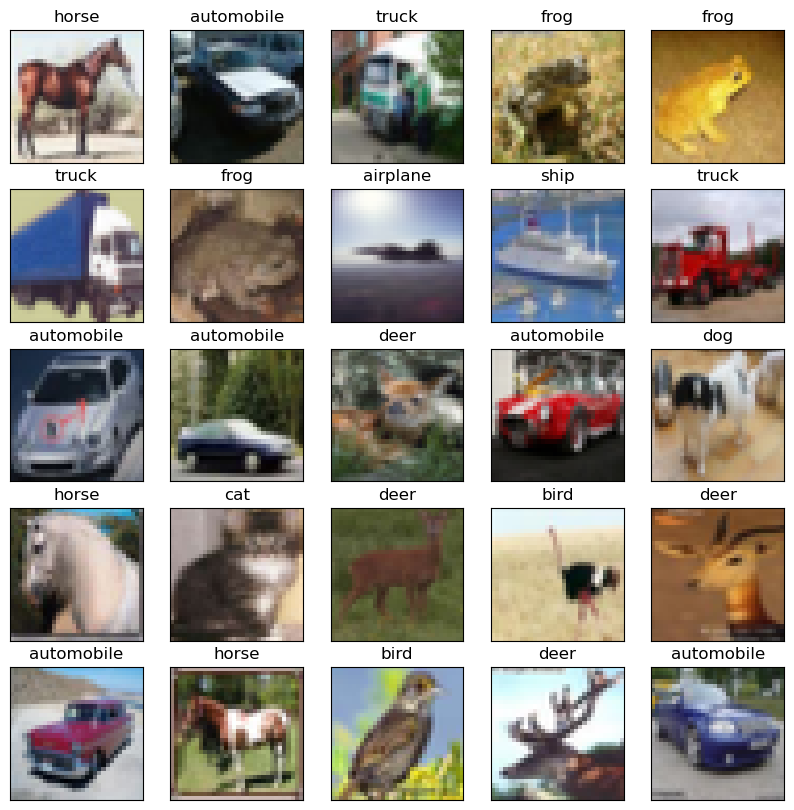

In [24]:
random_picture(data_batch_2, batch_meta)

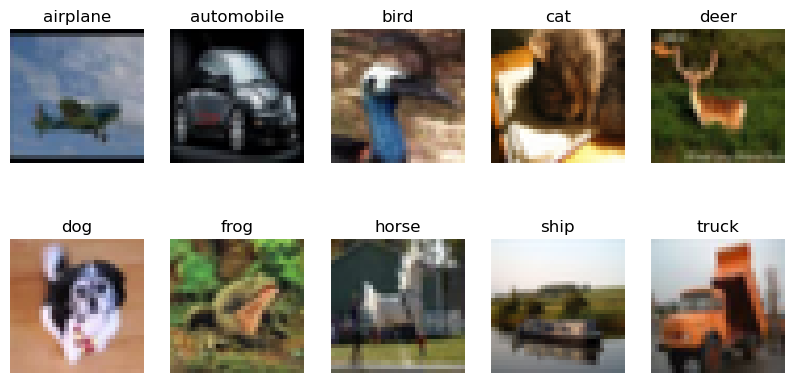

In [25]:
sample_picture(data_batch_1, batch_meta)

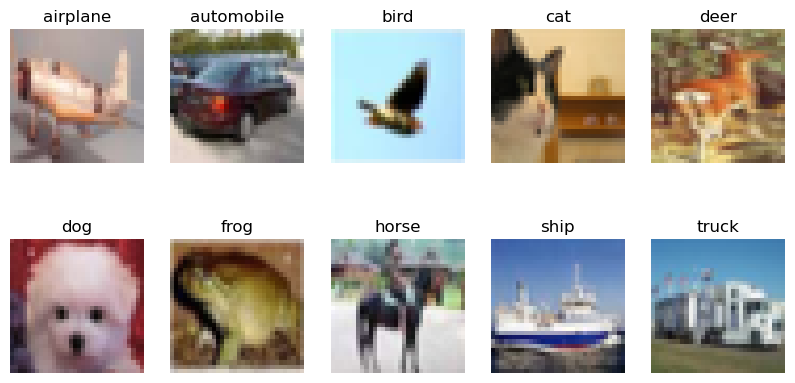

In [26]:
sample_picture(data_batch_2, batch_meta)

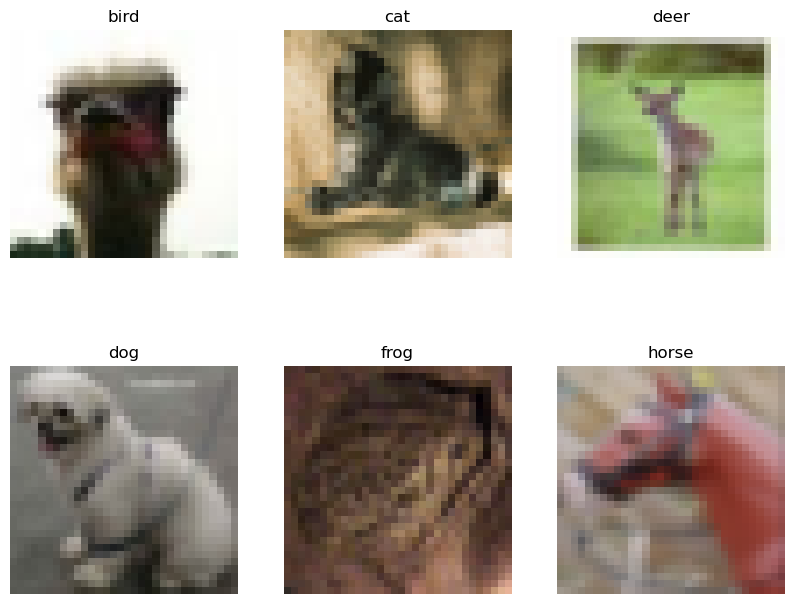

In [27]:
picture_of_animals(data_batch_1, batch_meta)

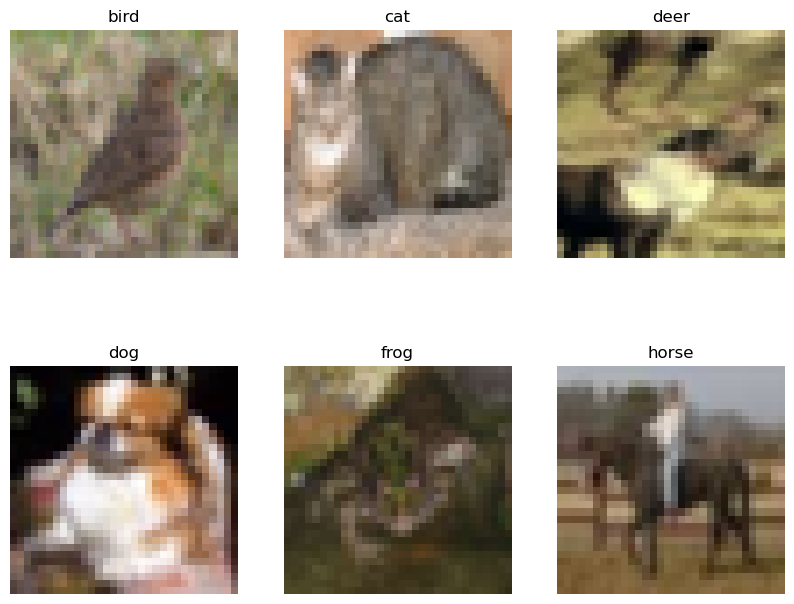

In [28]:
picture_of_animals(data_batch_2, batch_meta)